# Theoretical Questions


1. What is unsupervised learning in the context of machine learning?
   - It finds patterns or structures in data without using labels.
   - Examples include clustering and dimensionality reduction.

2. How does K-Means clustering algorithm work?
   - K-Means assigns points to the nearest cluster center and updates centers iteratively.
   - It repeats until cluster centers stop changing.

3. Explain the concept of a dendrogram in hierarchical clustering.
   - A dendrogram is a tree diagram showing clusters and their merging distances.
   - It helps visualize how clusters form at different levels.

4. What is the main difference between K-Means and Hierarchical Clustering?
   - K-Means needs the number of clusters (K) beforehand.
   - Hierarchical clustering builds a tree of clusters without predefining K.

5. What are the advantages of DBSCAN over K-Means?
   - DBSCAN can detect clusters of any shape and identify noise points.
   - It also does not require specifying the number of clusters.

6. When would you use Silhouette Score in clustering?
   - To measure how well points fit within their cluster versus other clusters.
   - It combines cohesion (tightness) and separation for evaluation.

7. What are the limitations of Hierarchical Clustering?
   - It is slow for large datasets and cannot undo wrong merges.
   - Sensitive to noise and outliers, which can distort clusters.

8. Why is feature scaling important in clustering algorithms like K-Means?
   - Clustering uses distances, so features with large scales can dominate.
   - Scaling ensures all features contribute equally to clustering.

9. How does DBSCAN identify noise points?
   - Points that do not have enough neighbors within a defined radius are labeled as noise.
   - Noise points are not part of any cluster.

10. Define inertia in the context of K-Means.
    - Inertia is the sum of squared distances of points to their cluster center.
    - Lower inertia means points are closer to their assigned cluster center.

11. What is the elbow method in K-Means clustering?
    -  Plot inertia vs number of clusters (K) and look for a sharp bend (“elbow”).
    - The elbow suggests the optimal number of clusters.

12. Describe the concept of "density" in DBSCAN.
    - Density is the number of points within a specified radius around a point.
    - High-density regions form clusters, low-density points may be noise.

13. Can hierarchical clustering be used on categorical data?
    - Yes, using distance metrics like Hamming distance.
    - It can cluster based on similarity of categorical attributes.

14. What does a negative Silhouette Score indicate?
    - Points are closer to other clusters than their own.
    - This suggests incorrect or poor clustering.

15. Explain the term "linkage criteria" in hierarchical clustering.
    - Linkage defines how distance between clusters is calculated.
    - Examples include single (min distance), complete (max), or average linkage.

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
    - K-Means assumes clusters are roughly equal in size and spherical.
    - It struggles with elongated, dense, or uneven clusters.

17. What are the core parameters in DBSCAN, and how do they influence clustering?
    - epsilon defines the neighborhood radius and minPoints the minimum cluster size.
    - Changing these affects how clusters and noise points are detected.

18. How does K-Means++ improve upon standard K-Means initialization?
    - It selects initial cluster centers that are far apart.
    - This reduces chances of poor clustering and speeds up convergence.

19. What is agglomerative clustering?
    - It is a bottom-up hierarchical approach where each point starts as its own cluster.
    - Clusters are merged step by step based on a linkage criterion.

20. What makes Silhouette Score a better metric than just inertia for model evaluation?
    - Silhouette Score considers both how close points are to their cluster and far from others.
    - Inertia only measures distance to cluster centers and ignores separation.

# Practical Questions

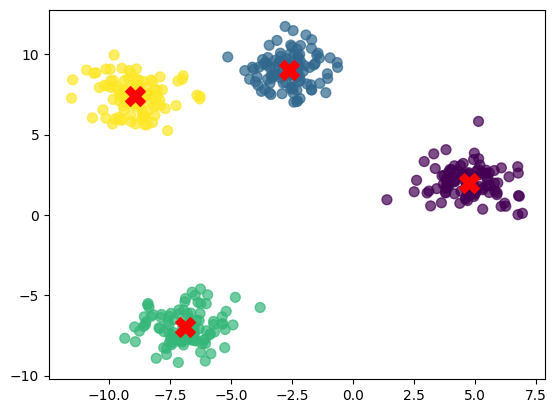

In [1]:
#21 Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=1.0, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.show()

In [2]:
#22 Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

print(labels[:10])

[1 1 1 1 1 1 1 1 1 1]


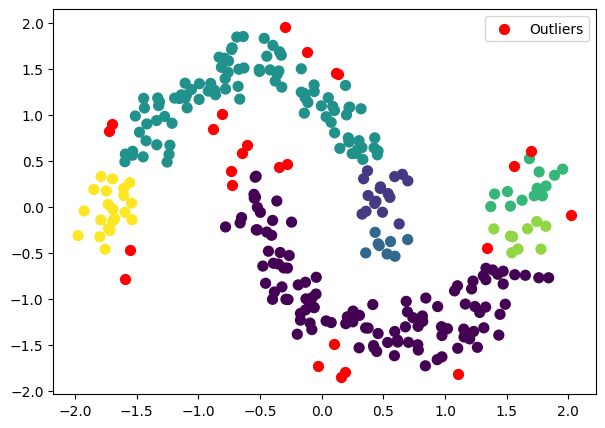

In [3]:
#23 Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

dbscan_model = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan_model.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_scaled[labels!=-1, 0], X_scaled[labels!=-1, 1], c=labels[labels!=-1], cmap='viridis', s=50)
plt.scatter(X_scaled[labels==-1, 0], X_scaled[labels==-1, 1], c='red', s=50, label='Outliers')
plt.legend()
plt.show()

In [4]:
#24  Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X_wine = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wine)

kmeans_wine = KMeans(n_clusters=3, random_state=42)
wine_labels = kmeans_wine.fit_predict(X_scaled)

unique, counts = np.unique(wine_labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print(cluster_sizes)

{np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


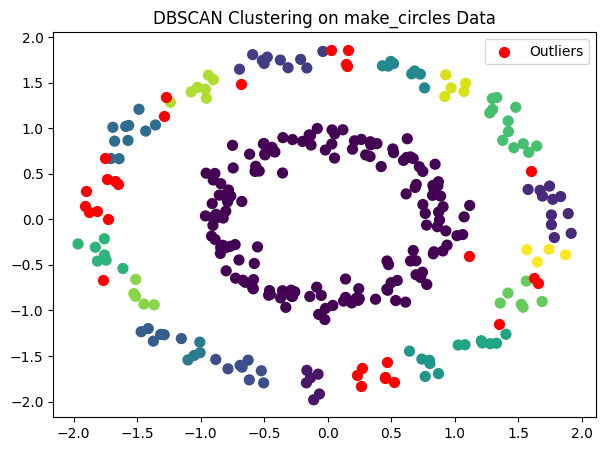

In [5]:
#25  Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

dbscan_model = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan_model.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_scaled[labels!=-1, 0], X_scaled[labels!=-1, 1], c=labels[labels!=-1], cmap='viridis', s=50)
plt.scatter(X_scaled[labels==-1, 0], X_scaled[labels==-1, 1], c='red', s=50, label='Outliers')
plt.legend()
plt.title("DBSCAN Clustering on make_circles Data")
plt.show()

In [6]:
#26  Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

cancer = load_breast_cancer()
X_cancer = cancer.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_cancer)

kmeans_cancer = KMeans(n_clusters=2, random_state=42)
kmeans_cancer.fit(X_scaled)

print(kmeans_cancer.cluster_centers_)

[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


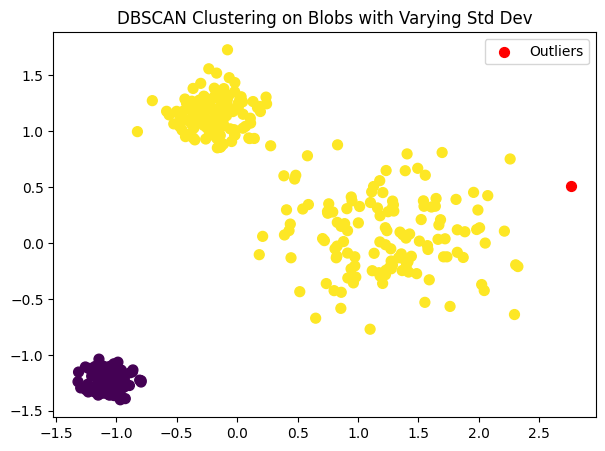

In [7]:
#27 Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X, _ = make_blobs(n_samples=400, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
X_scaled = StandardScaler().fit_transform(X)

dbscan_model = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan_model.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_scaled[labels!=-1, 0], X_scaled[labels!=-1, 1], c=labels[labels!=-1], cmap='viridis', s=50)
plt.scatter(X_scaled[labels==-1, 0], X_scaled[labels==-1, 1], c='red', s=50, label='Outliers')
plt.legend()
plt.title("DBSCAN Clustering on Blobs with Varying Std Dev")
plt.show()

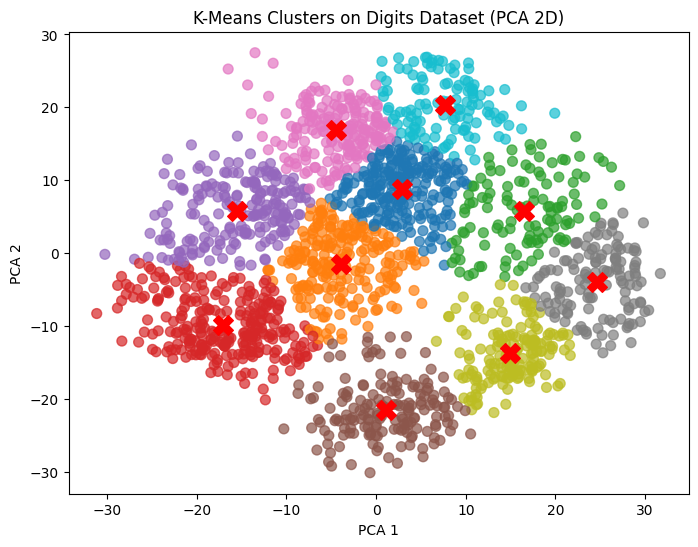

In [8]:
#28 Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

digits = load_digits()
X_digits = digits.data

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_digits)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_2d)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title("K-Means Clusters on Digits Dataset (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

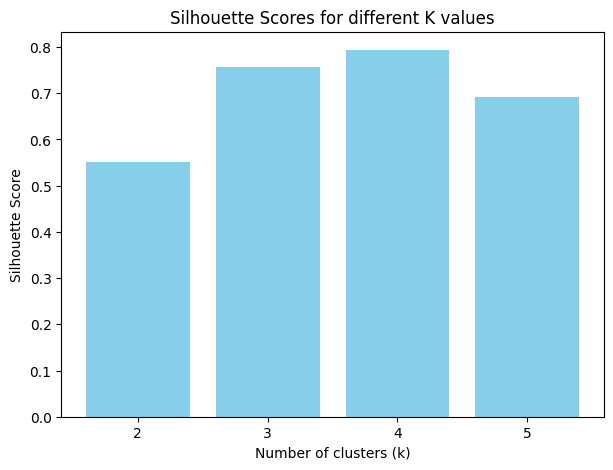

In [9]:
#29 Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.0, random_state=42)

sil_scores = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

plt.figure(figsize=(7,5))
plt.bar([str(k) for k in k_values], sil_scores, color='skyblue')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for different K values")
plt.show()

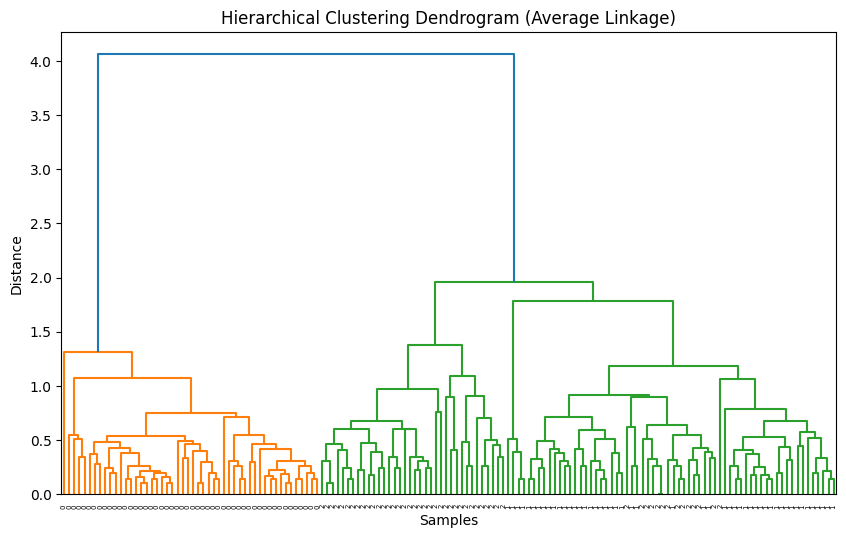

In [10]:
#30 Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
X = iris.data

linked = linkage(X, method='average')

plt.figure(figsize=(10, 6))
dendrogram(linked, labels=iris.target, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

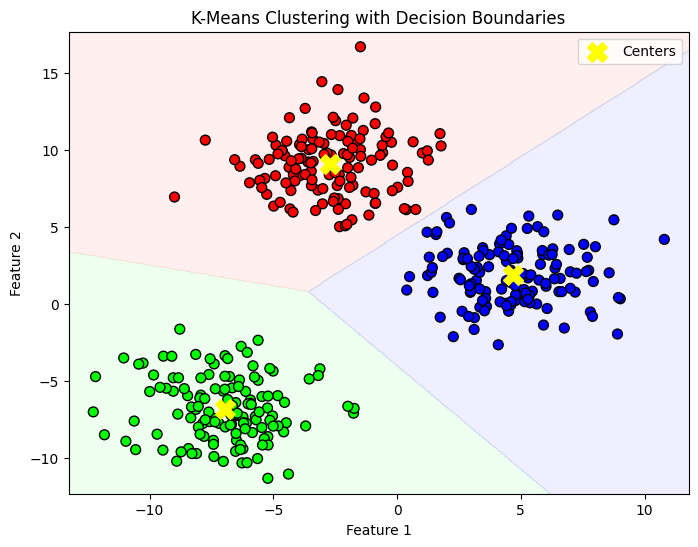

In [11]:
#31 Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

X, _ = make_blobs(n_samples=400, centers=3, cluster_std=2.0, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_background = ListedColormap(['#FFCCCC', '#CCFFCC', '#CCCCFF'])
cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cmap_points, s=50, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='yellow', marker='X', s=200, label='Centers')
plt.title("K-Means Clustering with Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

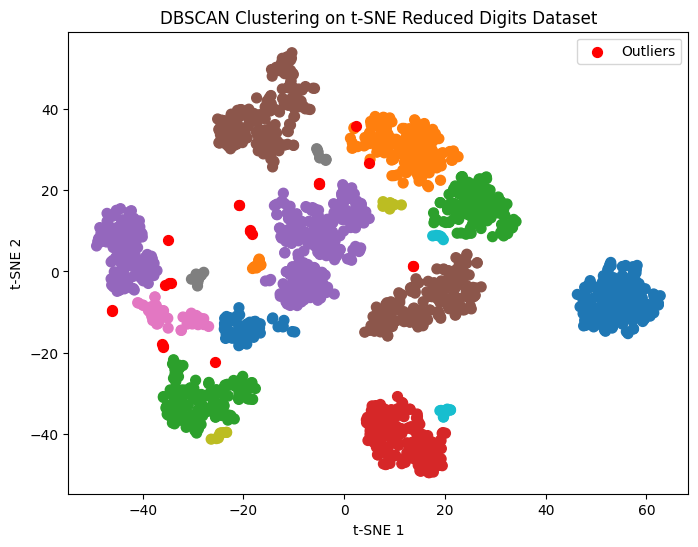

In [12]:
#32 Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

digits = load_digits()
X = digits.data

X_scaled = StandardScaler().fit_transform(X)

tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', init='random')
X_2d = tsne.fit_transform(X_scaled)

dbscan = DBSCAN(eps=3.0, min_samples=5)
labels = dbscan.fit_predict(X_2d)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[labels!=-1, 0], X_2d[labels!=-1, 1], c=labels[labels!=-1], cmap='tab10', s=50)
plt.scatter(X_2d[labels==-1, 0], X_2d[labels==-1, 1], c='red', s=50, label='Outliers')
plt.title("DBSCAN Clustering on t-SNE Reduced Digits Dataset")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()


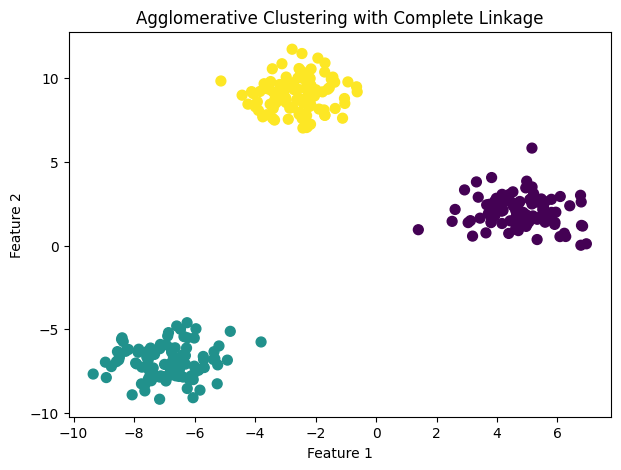

In [13]:
#33  Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

agglo = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agglo.fit_predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering with Complete Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

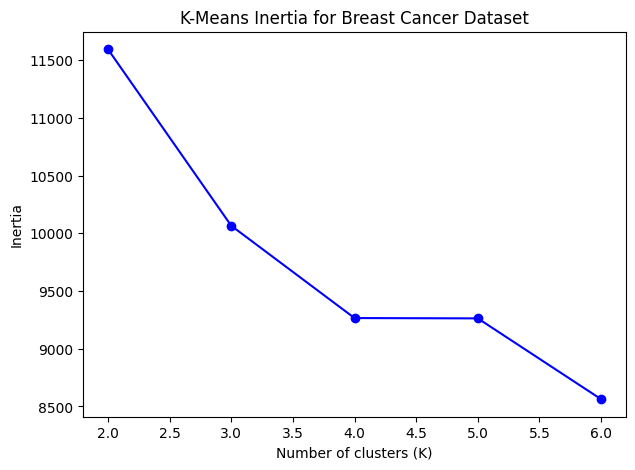

In [14]:
#34 Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cancer = load_breast_cancer()
X = cancer.data

X_scaled = StandardScaler().fit_transform(X)

k_values = range(2, 7)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(list(k_values), inertia_values, marker='o', color='blue')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("K-Means Inertia for Breast Cancer Dataset")
plt.show()

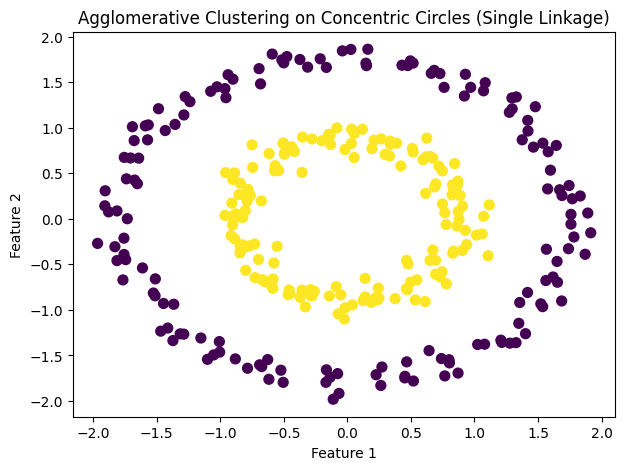

In [15]:
#35  Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

X, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agglo.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on Concentric Circles (Single Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [16]:
#36 Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X = wine.data

X_scaled = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)

Number of clusters (excluding noise): 0


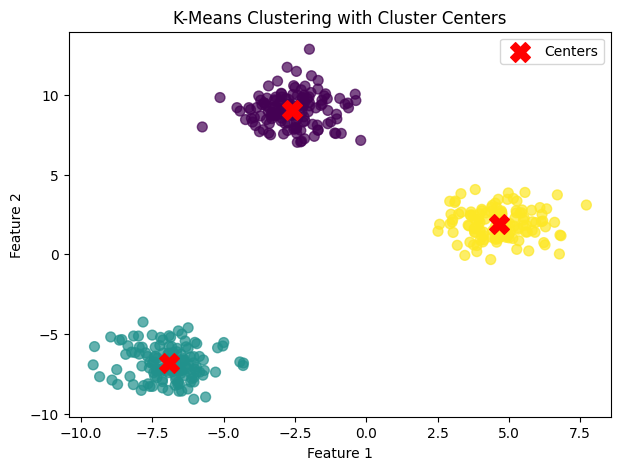

In [17]:
#37 Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.0, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centers')
plt.title("K-Means Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [18]:
#38  Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

iris = load_iris()
X = iris.data

X_scaled = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

n_noise = np.sum(labels == -1)
print("Number of noise samples:", n_noise)

Number of noise samples: 26


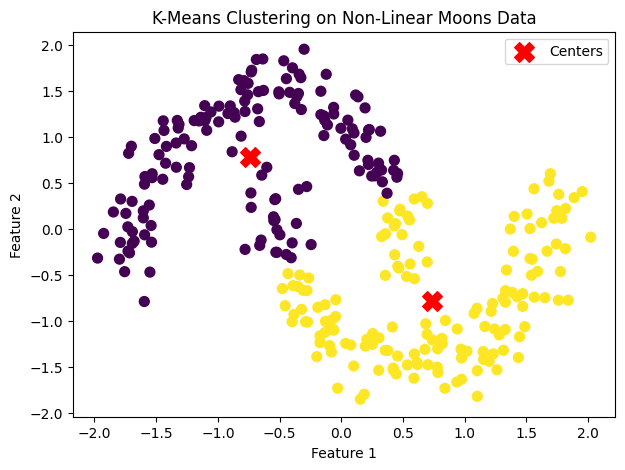

In [19]:
#39 Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centers')
plt.title("K-Means Clustering on Non-Linear Moons Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

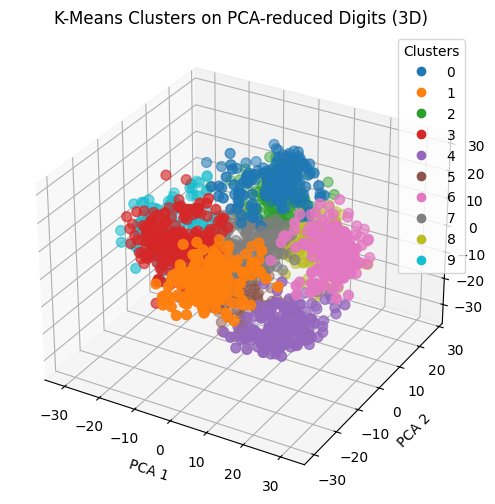

In [20]:
#40  Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

digits = load_digits()
X = digits.data

pca = PCA(n_components=3, random_state=42)
X_3d = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_3d)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_3d[:,0], X_3d[:,1], X_3d[:,2], c=labels, cmap='tab10', s=50)
ax.set_title("K-Means Clusters on PCA-reduced Digits (3D)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [21]:
#41 Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)
print("Silhouette Score for KMeans with 5 clusters:", score)


Silhouette Score for KMeans with 5 clusters: 0.678738720085253


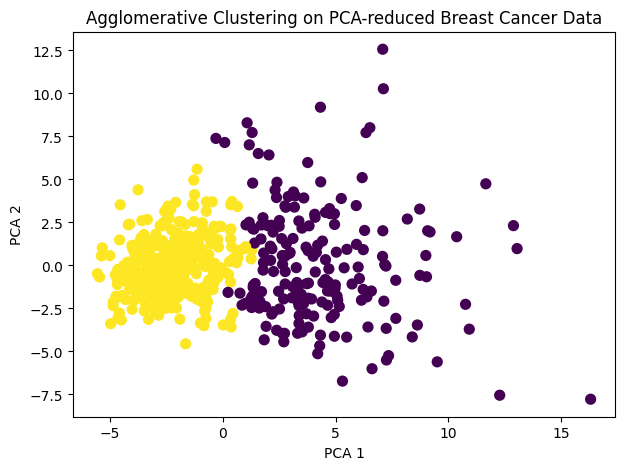

In [22]:
#42 Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

data = load_breast_cancer()
X = data.data

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)

agglo = AgglomerativeClustering(n_clusters=2)
labels = agglo.fit_predict(X_2d)

plt.figure(figsize=(7,5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on PCA-reduced Breast Cancer Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

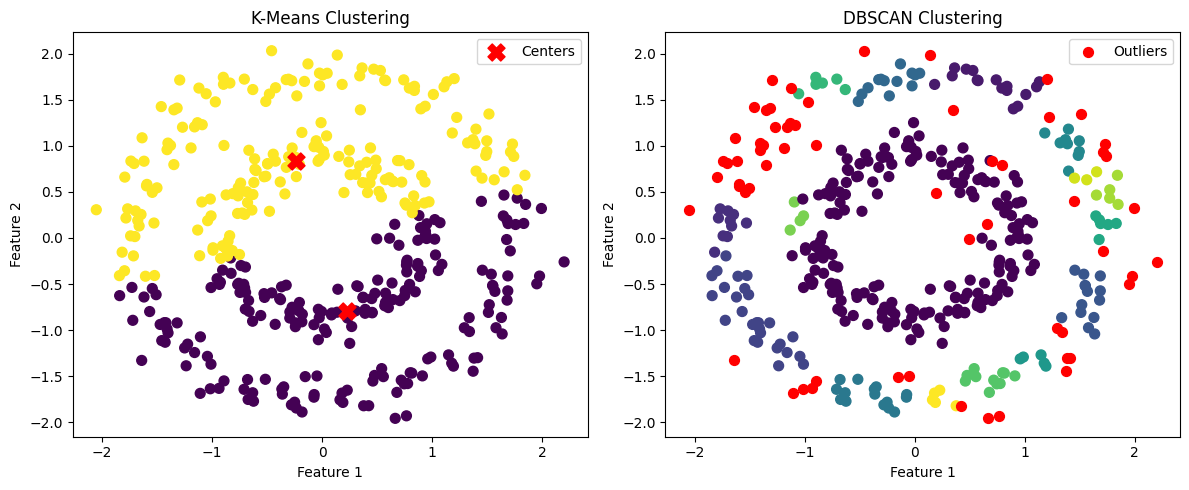

In [23]:
#43 Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

X, _ = make_circles(n_samples=400, noise=0.08, factor=0.5, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=150, label='Centers')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X_scaled[dbscan_labels!=-1,0], X_scaled[dbscan_labels!=-1,1],
            c=dbscan_labels[dbscan_labels!=-1], cmap='viridis', s=50)
plt.scatter(X_scaled[dbscan_labels==-1,0], X_scaled[dbscan_labels==-1,1],
            c='red', s=50, label='Outliers')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.tight_layout()
plt.show()

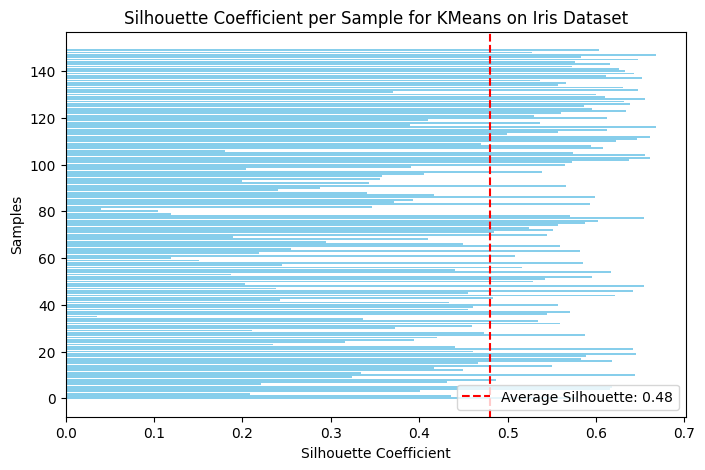

In [24]:
#44  Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

iris = load_iris()
X = iris.data

X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

sil_values = silhouette_samples(X_scaled, labels)
avg_score = silhouette_score(X_scaled, labels)

plt.figure(figsize=(8,5))
y_ticks = np.arange(len(X))
plt.barh(y_ticks, sil_values, color='skyblue')
plt.axvline(avg_score, color='red', linestyle='--', label=f"Average Silhouette: {avg_score:.2f}")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Samples")
plt.title("Silhouette Coefficient per Sample for KMeans on Iris Dataset")
plt.legend()
plt.show()

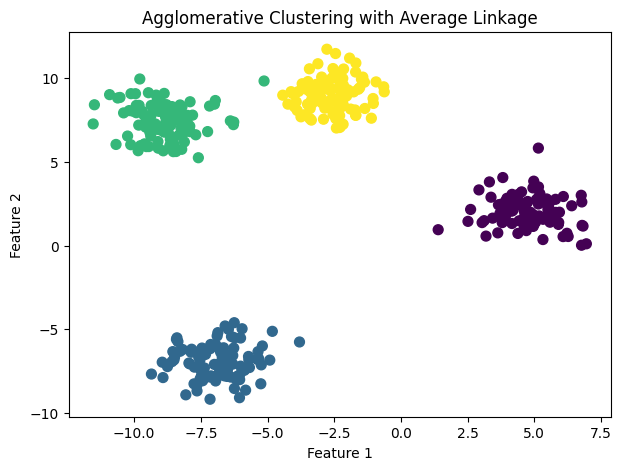

In [25]:
#45 Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.0, random_state=42)

agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agglo.fit_predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering with Average Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

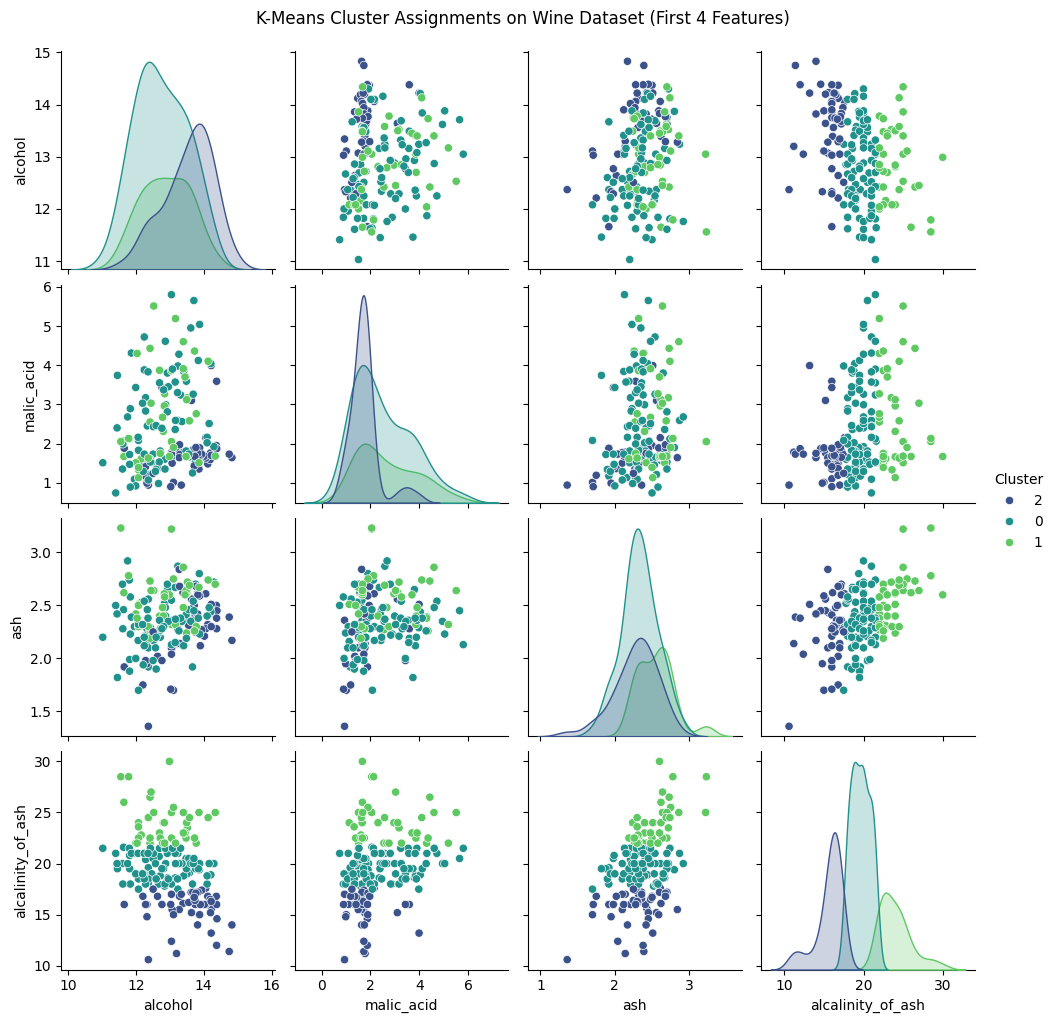

In [26]:
#46 Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd

wine = load_wine()
X = wine.data[:, :4]  # Use first 4 features
feature_names = wine.feature_names[:4]

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

df = pd.DataFrame(X, columns=feature_names)
df['Cluster'] = labels.astype(str)

sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle("K-Means Cluster Assignments on Wine Dataset (First 4 Features)", y=1.02)
plt.show()

In [27]:
#47 Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.5, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

n_noise = np.sum(labels == -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)
print("Number of noise points:", n_noise)

Number of clusters (excluding noise): 2
Number of noise points: 0


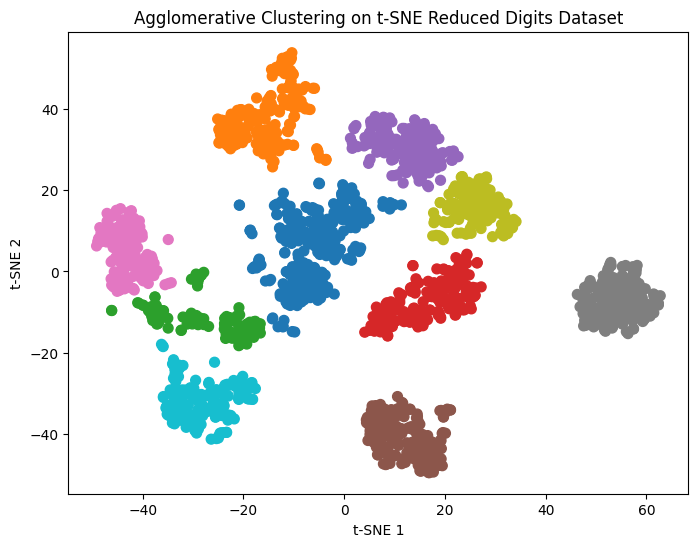

In [28]:
#48 Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

digits = load_digits()
X = digits.data

X_scaled = StandardScaler().fit_transform(X)

tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', init='random')
X_2d = tsne.fit_transform(X_scaled)

agglo = AgglomerativeClustering(n_clusters=10)
labels = agglo.fit_predict(X_2d)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap='tab10', s=50)
plt.title("Agglomerative Clustering on t-SNE Reduced Digits Dataset")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()